# Capstone-Project-aiml
## AIML Online Capstone - Pneumonia Detection Challenge
### Project Objectives
The objective of the project is,  Learn to how to do build an Object Detection Model  Use transfer learning to fine-tune a model.  Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.  Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

## The Real Problem
### What is Pneumonia?
Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2017, 920,000 children under the age of 5 died from the disease. It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or postradiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis. CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift. Pneumonia Detection Now to detection Pneumonia we need to detect Inflammation of the lungs. In this project, you’re challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

### Business Domain Value
Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box. Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology). Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information hidden in the massive amount of data, which in turn can assist clinical decision making.

### Project Description
In this capstone project, the goal is to build a pneumonia detection system, to locate the position of inflammation in an image. Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. Dense tissues such as bones absorb X-rays and appear white in the image. While we are theoretically detecting “lung opacities”, there are lung opacities that are not pneumonia related. In the data, some of these are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images:

Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. Details about the data and dataset files are given in below link, https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

#### Pre-Processing, Data Visualization, EDA
 Exploring the given Data files, classes and images of different classes.  Dealing with missing values  Visualization of different classes  Analysis from the visualization of different classes.

#### Model Building
 Building a pneumonia detection model starting from basic CNN and then improving upon it.  Train the model  To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

#### Test the Model, Fine-tuning and Repeat
 Test the model and report as per evaluation metrics  Try different models  Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. for these models to fine-tune them  Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

### Reference
Acknowledgment for the datasets. https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements

In [ ]:
!pip install keras==1.2.2

In [ ]:
# ! pip uninstall scipy
! pip install scipy==1.1.0

In [ ]:
!pip install tensorflow-gpu==1.15

In [ ]:
!pip install tensorflow-addons[1.15.0]

In [ ]:
import tensorflow.compat.v1 as tf
# tf.compat.v1.disable_eager_execution()
tf.__version__

'1.15.0'

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import scipy
scipy.__version__

'1.1.0'

In [ ]:
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pydicom

In [ ]:
import os
import pandas as pd
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import cv2
import datetime
import pytz
import multiprocessing
from sklearn.utils import shuffle
%matplotlib inline 
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import hashlib
import keras
import sklearn 
import h5py
from PIL import Image
import importlib


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install kaggle to download the dataset
!pip install -q kaggle

### Setting up kaggle to download datasets

- Please setup the kaggle_path where you have kept the kaggle.json file
- Or create the directory structure in your google drive like MyDrive/Colab/.kaggle/ and upload kaggle.json to this location

In [ ]:
# Ensure you have setup kaggle.json with the required API token and saved it to your google drive mounted above.
# Provide the location of the .kaggle/kagle.json file
kaggle_path = '/content/drive/MyDrive/Colab/.kaggle/'
os.chdir(kaggle_path)
#!export KAGGLE_CONFIG_DIR=/content/drive/MyDrive/Colab/.kaggle/

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle --version

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Kaggle API 1.5.12


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# Kaggle api version should be 1.5.12 or higher
!kaggle --version

Kaggle API 1.5.12


### Import data 
#### Download datasets from kaggle
- Please setup the destination path where you want to install the dataset
- Or create the directory structure as MyDrive/Colab/Capstone Project/ to store the datasets in your google drive

In [ ]:
project_path = '/content/drive/MyDrive/Colab/Capstone Project/'
os.chdir(project_path)
data_path = project_path + 'dataset'

if not os.path.exists(data_path):
    os.makedirs(data_path)

os.chdir(data_path)

# Downloading kaggle dataset from Pneumonia detection challenge
file_path = data_path + '/rsna-pneumonia-detection-challenge.zip'
if not os.path.exists(file_path):
  !kaggle competitions download -q -c rsna-pneumonia-detection-challenge

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab/Capstone Project/dataset'

Dataset is ready to be read and to do EDA

Unzip the dataset

In [ ]:
import zipfile
if not os.path.exists(data_path + '/' + 'stage_2_train_images'):
  zip_ref = zipfile.ZipFile(data_path + '/rsna-pneumonia-detection-challenge.zip', 'r')
  zip_ref.extractall()
  zip_ref.close()

Load Labels

In [ ]:
labels_df = pd.read_csv(data_path + '/stage_2_train_labels.csv')
labels_df.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [ ]:
det_class_info_df = pd.read_csv(data_path + '/stage_2_detailed_class_info.csv')
det_class_info_df.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [ ]:
print(labels_df.shape, det_class_info_df.shape)

(30227, 6) (30227, 2)


Remove Duplicates & merge the dataframes into one
- Merge based on patient id

In [ ]:
def add_dcm_ext(id):
  if ('xxx' in id):
    id = id.strip('xxx ')
  return id + '.dcm'


In [ ]:
det_class_info_df = det_class_info_df.drop_duplicates().reset_index(drop=True)

merged_class_df = labels_df.merge(det_class_info_df, left_on='patientId', right_on='patientId', how='inner')
merged_class_df['patientId'] = merged_class_df['patientId'].apply(add_dcm_ext)
merged_class_df.head()

patientId  ...                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm  ...  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm  ...  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb.dcm  ...  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm  ...                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4.dcm  ...                  Lung Opacity

[5 rows x 7 columns]

In [ ]:
# Also, created the list of unique class labels and targets 
det_class_info_df['Target'] = det_class_info_df['class'].apply(lambda x: 1 if x =='Lung Opacity' else 0)
det_class_info_df.head()

patientId                         class  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal       0
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal       0
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity       1

In [ ]:
# As Expected the shape of merged df is higher than det_class_info_df. 
# Because the merged df has multiple entries of a single patientId having multiple bounding boxes.
print(merged_class_df.shape, det_class_info_df.shape, labels_df.shape)

(30227, 7) (26684, 3) (30227, 6)


### Exploratory Data Analysis

#### 1. Analyzing Class distribution

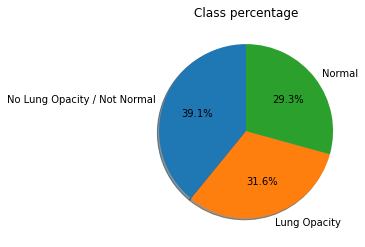

In [ ]:
class_info=merged_class_df["class"].value_counts()
labels = (np.array(class_info.index))
sizes = (np.array((class_info / class_info.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Class percentage")
plt.show()

#### 2. Class distriution with Target class

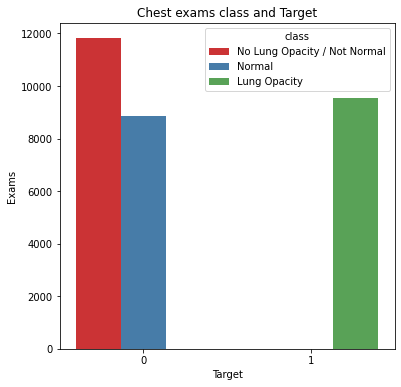

In [ ]:
fig, ax = plt.subplots(nrows=1,figsize=(6,6))
tmp = merged_class_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Exams',hue='class',data=df, palette='Set1')
plt.title("Chest exams class and Target")
plt.show()

#### 3. Visualizing the images

- To validate the resized array against the original image, we are first going to plot the original images and then their resized images

In [ ]:
# This function is to visualize the actual image and the bounding boxes
def plot_dcm_images(ax, patientId, c, bb_box=False):
  dcm_array = dcm.read_file(data_path +'/' + 'stage_2_train_images/' + patientId + '.dcm')
  ax[c//3, c%3].imshow(dcm_array.pixel_array, cmap=plt.cm.bone)
  #print(dcm_array.pixel_array.shape)
  ax[c//3, c%3].set_title('ID: {}\n'.format(patientId))  
  if bb_box:
    for idx, row in merged_class_df[merged_class_df['patientId']==patientId].iterrows():
      #print(idx)
      ax[c//3, c%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                 width=row['width'],height=row['height'],
                 linewidth=1, edgecolor='r', facecolor='none'))

##### a. Visualizing original images and bounding boxes

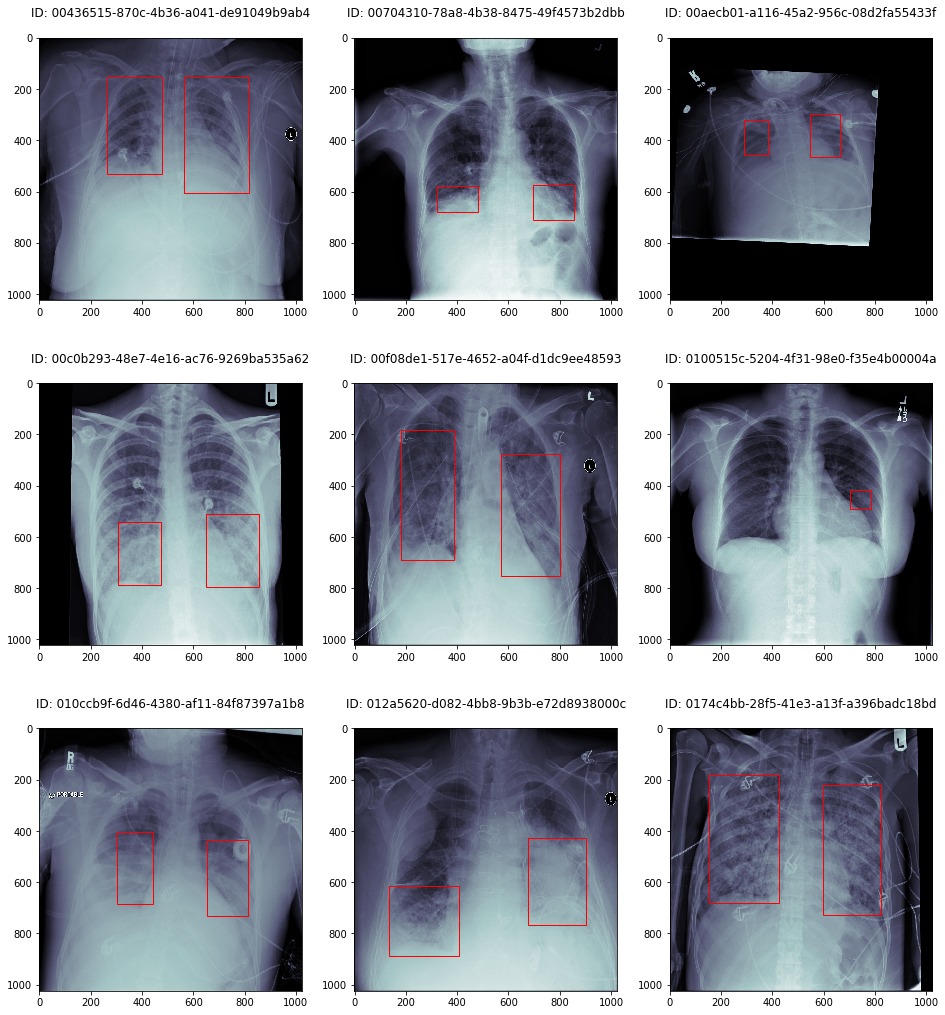

In [ ]:
# Visualizing the original images and bounding boxes
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
image_ids=[]
# Target = 1
# for patientId in det_class_info_df[det_class_info_df['Target']==1].patientId.sample(9):
for patientId in det_class_info_df[det_class_info_df['Target']==1].patientId[:9]:
  image_ids.append(patientId)
  plot_dcm_images(ax, patientId, c, True)
  c = c + 1

In [ ]:
# Saved list of patient ID's for visualizing the resized images
for patientID in image_ids:
  print(patientID)

00436515-870c-4b36-a041-de91049b9ab4
00704310-78a8-4b38-8475-49f4573b2dbb
00aecb01-a116-45a2-956c-08d2fa55433f
00c0b293-48e7-4e16-ac76-9269ba535a62
00f08de1-517e-4652-a04f-d1dc9ee48593
0100515c-5204-4f31-98e0-f35e4b00004a
010ccb9f-6d46-4380-af11-84f87397a1b8
012a5620-d082-4bb8-9b3b-e72d8938000c
0174c4bb-28f5-41e3-a13f-a396badc18bd


##### b. Visualizing resized images and readjusted bounding box coordinates

In [ ]:
# Pass bb_box as True for target 1 to draw bounding boxes
def plot_images(ax, patientId, c, bb_box=False):
  idx=np.where(det_class_info_df['patientId']==patientId)
  print(idx)
  ax[c//3, c%3].imshow(resized_array[idx[0][0]], cmap=plt.cm.bone)
  scale = target_img_size / 1024
  ax[c//3, c%3].set_title('ID: {}\n'.format(patientId))
  if bb_box:
    for idx, row in merged_class_df[merged_class_df['patientId']==patientId].iterrows():
      ax[c//3, c%3].add_patch(Rectangle(xy=(row['x']*scale, row['y']*scale),
                 width=row['width']*scale,height=row['height']*scale,
                 linewidth=2, edgecolor="white",fill=False))

(array([4]),)
(array([7]),)
(array([12]),)
(array([13]),)
(array([15]),)
(array([17]),)
(array([19]),)
(array([21]),)
(array([25]),)


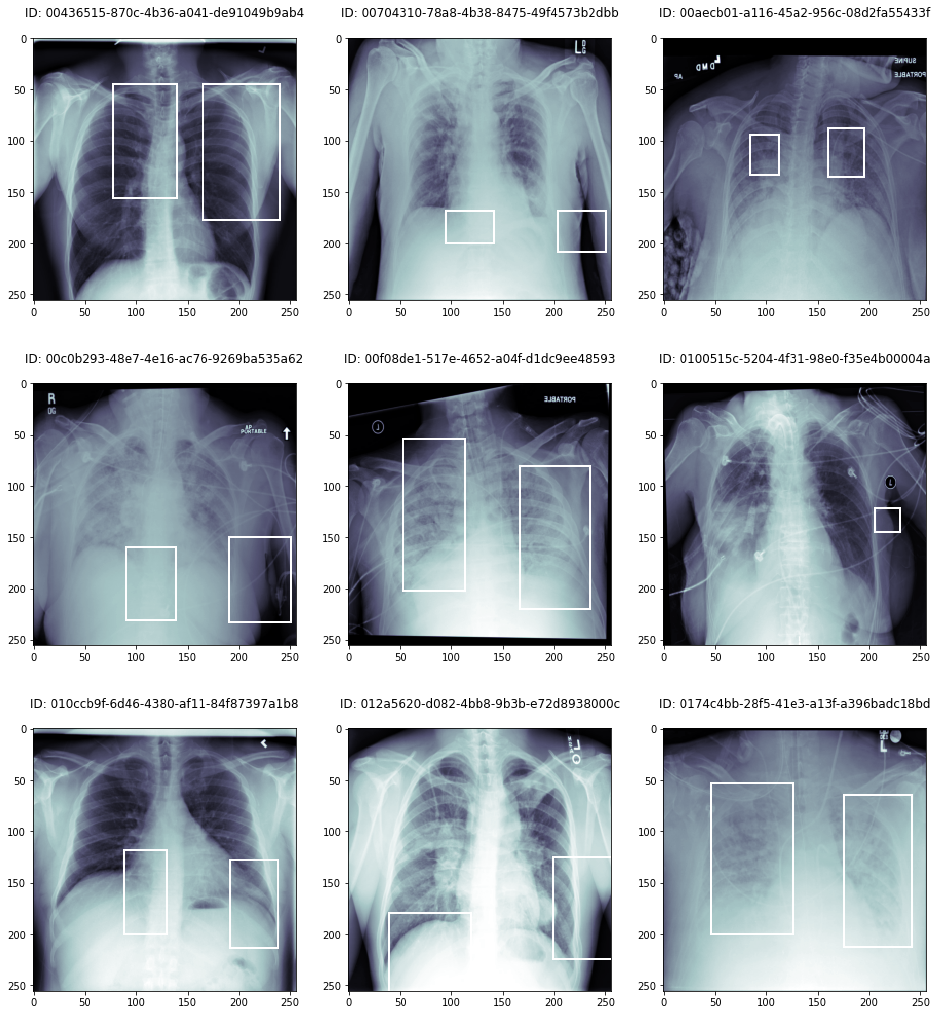

In [ ]:
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
#image_ids1=[]
# Target = 0
for patientId in image_ids:
  #image_ids1.append(patientId)
  plot_images (ax, patientId, c, True)
  c = c + 1

##### c. Visualize images without Pneumonia 

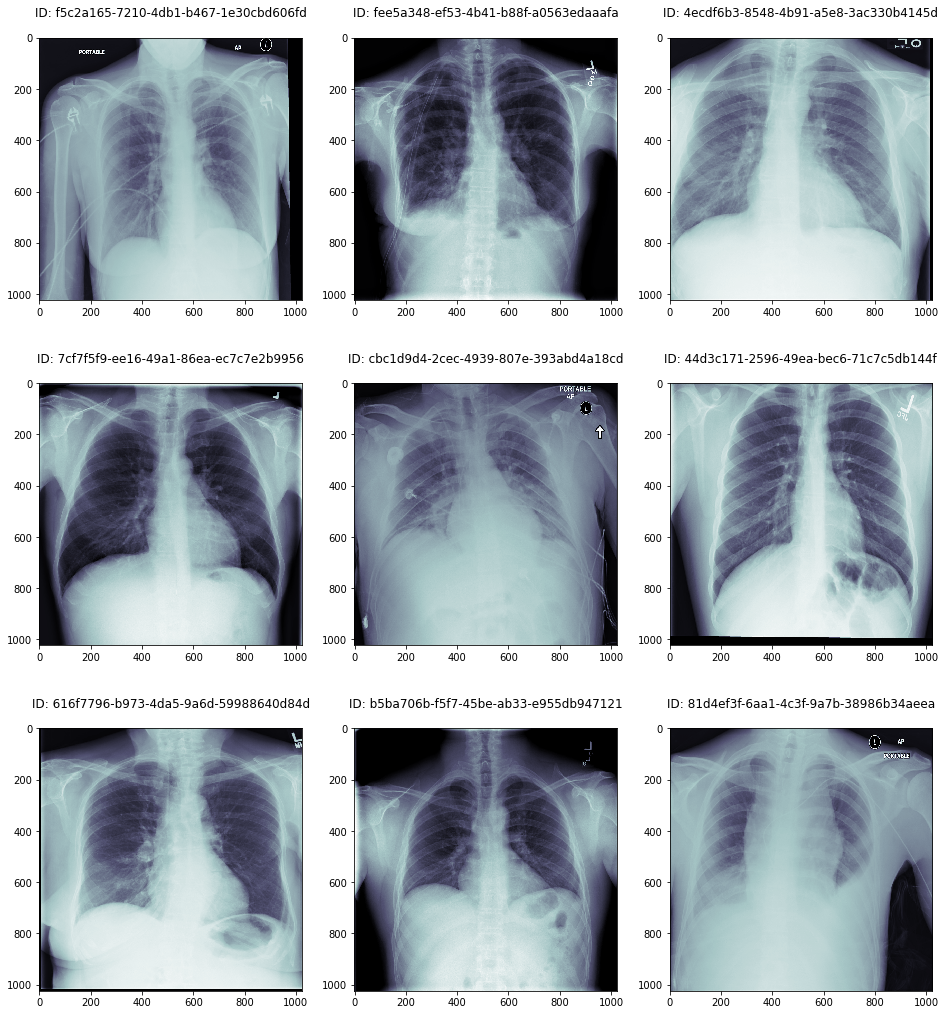

In [ ]:
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
image_ids1=[]
# Target = 0
for patientId in det_class_info_df[det_class_info_df['Target']==0].patientId.sample(9):
  image_ids1.append(patientId)
  plot_dcm_images (ax, patientId, c, False)
  c = c + 1

#### 4. Distribution of Bounding Boxes

In [ ]:
bbox_df = merged_class_df.groupby('patientId').count().reset_index()
print(bbox_df.shape)
bbox_df.head()

(26684, 7)


patientId  x  y  width  height  Target  class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm  0  0      0       0       1      1
1  000924cf-0f8d-42bd-9158-1af53881a557.dcm  0  0      0       0       1      1
2  000db696-cf54-4385-b10b-6b16fbb3f985.dcm  2  2      2       2       2      2
3  000fe35a-2649-43d4-b027-e67796d412e0.dcm  2  2      2       2       2      2
4  001031d9-f904-4a23-b3e5-2c088acd19c6.dcm  2  2      2       2       2      2

In [ ]:
bbox_df.groupby('x').count().reset_index()

x  patientId      y  width  height  Target  class
0  0      20672  20672  20672   20672   20672  20672
1  1       2614   2614   2614    2614    2614   2614
2  2       3266   3266   3266    3266    3266   3266
3  3        119    119    119     119     119    119
4  4         13     13     13      13      13     13

Observation:
- Number of patients without any bounding box = 20672
- Number of patients with 1 bounding box = 2614
- Number of patients with 2 bounding boxes = 3266
- Number of patients with 3 bounding boxes = 119
- Number of patients with 4 bounding boxes = 13

Most commmon cases of Pneumonia have 2 bounding boxes

### Data Pre-processing
- Missing data treatment
- Resizing labels data
- Image augmentation
- train test split


#### 1. Missing data treatment


In [ ]:
merged_class_df.head()

patientId  ...                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  ...  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  ...  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  ...  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5  ...                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4  ...                  Lung Opacity

[5 rows x 7 columns]

In [ ]:
# Check for missing values
merged_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
# Check for Pneumonia detected case count
merged_class_df[merged_class_df['Target'] == 1].count()

patientId    9555
x            9555
y            9555
width        9555
height       9555
Target       9555
class        9555
dtype: int64

##### Observation: 
- Pneumonia cases = 9555, 
- Non-null values for x, y, width, height columns = 9555

That means all the remaining values in x, y, width and height columns are NaN and can be replaced with 0 for training the model

#### 2. Duplicate image detection

In [ ]:
def md5Checksum(file):
  with open(data_path + '/' + 'stage_2_train_images' + '/' + file + '.dcm', "rb") as f:
    bytes = f.read()
    file_hash = hashlib.md5(bytes).hexdigest()
  return file_hash

In [ ]:
# Checksum to identify duplicate images
labels_df = pd.read_csv(data_path + '/stage_2_train_labels.csv')
det_class_info_df = pd.DataFrame()
if not os.path.exists(data_path + '/stage_2_detailed_class_info_updated.csv'):
  det_class_info_df = pd.read_csv(data_path + '/stage_2_detailed_class_info.csv')
  # Removing duplicates
  det_class_info_df=det_class_info_df.drop_duplicates().reset_index(drop=True)
  det_class_info_df['Target'] = det_class_info_df['class'].apply(lambda x: 1 if x =='Lung Opacity' else 0)
  filelist= det_class_info_df['patientId'].to_numpy()
  # Checksum to identify duplicate images
  checksum=[]
  for file in filelist:
    checksum.append(md5Checksum(file))
  checksum = np.array(checksum)
  det_class_info_df['checksum'] = checksum
  det_class_info_df.to_csv(data_path + '/stage_2_detailed_class_info_updated.csv')
else:
  det_class_info_df = pd.read_csv(data_path + '/stage_2_detailed_class_info_updated.csv', index_col=[0])

In [ ]:
det_class_info_df.to_csv(data_path + '/stage_2_detailed_class_info_updated.csv')

In [ ]:
print ('There are', det_class_info_df['checksum'].nunique(), 'unique checksum values')
print('There are', det_class_info_df['patientId'].nunique(), 'unique patients')

There are 26684 unique checksum values
There are 26684 unique patients


Observation:
- There are no duplicate images

In [ ]:
merged_class_df = labels_df.merge(det_class_info_df[['patientId','class', 'checksum']], left_on='patientId', right_on='patientId', how='inner')
print(merged_class_df.shape)
merged_class_df.head()

(30227, 8)


patientId  ...                          checksum
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  ...  78f614e5b22357018e0c50f08bddb412
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  ...  ee3b52fc977cbf1e4c2210b29221e630
2  00322d4d-1c29-4943-afc9-b6754be640eb  ...  0cdb347053dd580952be05667c20a593
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5  ...  d016ec2dd9a89189afba8183c12a9e1e
4  00436515-870c-4b36-a041-de91049b9ab4  ...  12657f14d27e815bd3026c6ffdfbae3b

[5 rows x 8 columns]

#### 3. Filter Data

In [ ]:
def filterPatientsByCriteria(criterion):
    x = 1
    for key in criterion.keys():
      if (x==1):
        filt_class_df = det_class_info_df[det_class_info_df['class']==key].sample(int(criterion.get(key)))
      else:
        filt_class_df=filt_class_df.append(det_class_info_df[det_class_info_df['class']==key].sample(int(criterion.get(key))))
      x = x + 1
    return filt_class_df

In [ ]:
def generateAugmentationList(filt_class_df, augm_count):
  rowlist=[]
  augm_data=[]
  for i in range(augm_count):
    exists=True 
    while exists:
      n=random.randint(0,filt_class_df.shape[0]-1)
      if n in rowlist:
        exists=True
      else:
        rowlist.append(n)
        row = filt_class_df.iloc[n]
        augm_data.append(['xxx ' + row['patientId'], row['class'], row['Target'], 'aug'])
        exists=False
  filt_class_df=filt_class_df.append(pd.DataFrame(augm_data, 
               columns=[ 'patientId', 'class', 'Target', 'row_type']),
               ignore_index = True)
  return filt_class_df

In [ ]:
det_class_info_df.Target.value_counts()

0    20672
1     6012
Name: Target, dtype: int64

In [ ]:
# Set the criterion = {} to load all data
# criterion={'Lung Opacity':3000, 
#            'No Lung Opacity / Not Normal': 400, 
#            'Normal': 400}

criterion={'Lung Opacity':6012, 
           'No Lung Opacity / Not Normal': 2000, 
           'Normal': 2000}

In [ ]:
filt_class_df = pd.DataFrame()
# if not os.path.exists(data_path + '/' + 'filtered_data_aug.csv'):
if not os.path.exists(data_path + '/' + 'filtered_data_new.csv'):
  # Filter data based on the criterion
  filt_class_df = filterPatientsByCriteria(criterion)
  # Dropping the checksum from the filtered dataset as it is not relevant
  # filt_class_df.drop(['checksum'], axis=1, inplace=True)
  # Add a new column with default value of 'orig'. The augmented row will have row_type = 'aug'
  filt_class_df['row_type'] = 'orig'
  # Append the augmented rows to the list
  # filt_class_df=generateAugmentationList(filt_class_df, 3000) # Augmenting 3000 images from the filtered list
  filt_class_df=shuffle(filt_class_df)
  filt_class_df.reset_index(drop=True)
  # Export the data to CSV
  # filt_class_df.to_csv(data_path + '/' + 'filtered_data_aug.csv')
  filt_class_df.to_csv(data_path + '/' + 'filtered_data_new.csv')
else:
  # filt_class_df = pd.read_csv(data_path + '/' + 'filtered_data_aug.csv')
  filt_class_df = pd.read_csv(data_path + '/' + 'filtered_data_new.csv')

In [ ]:
print(filt_class_df.shape)
filt_class_df.head()

(10012, 5)


Unnamed: 0                             patientId  ... Target  row_type
0        6489  5860110f-acc0-4361-9c51-7da5f5c102ce  ...      1      orig
1       13426  94ea3fe9-7dbb-491d-8c47-0d76b6888dad  ...      0      orig
2        6545  58e881f5-b41c-46c3-880c-a96b3b398ddd  ...      0      orig
3        2240  33c80447-e65b-41f8-ad03-523b78048641  ...      1      orig
4       22209  e2857880-a864-4391-a187-77e940705823  ...      0      orig

[5 rows x 5 columns]

#### 4. Image augmentation


In [ ]:
def getBoundingBox(patientId, shape):
  bbs=[]
  for idx_a, row in merged_class_df[(merged_class_df['patientId']==patientId)].iterrows():
    bbs.append(BoundingBox(x1=row['x'], y1=row['y'], x2=row['x']+row['width'], y2=row['y']+row['height']))
  return BoundingBoxesOnImage(bbs, shape=shape)

In [ ]:
def getImage(patientId):
  dcm_img = dcm.read_file(data_path +'/' + 'stage_2_train_images' + '/' + patientId + '.dcm').pixel_array
  return dcm_img

In [ ]:
def augment(patientId, target):
  dcm_img = getImage(patientId)
  aug_bbs=None
  augmentation = iaa.Sequential([
      iaa.Fliplr(0.5),
      iaa.OneOf([ ## geometric transform
          iaa.Affine(
              scale={"x": (0.98, 1.02), "y": (0.98, 1.04)},
              translate_percent={"x": (-0.02, 0.02), "y": (-0.04, 0.04)},
              rotate=(-2, 2),
              shear=(-1, 1),
          ),
          iaa.PiecewiseAffine(scale=(0.001, 0.025)),
      ]),
      iaa.OneOf([ ## brightness or contrast
          iaa.Multiply((0.9, 1.1)),
          iaa.ContrastNormalization((0.9, 1.1)),
      ]),
      iaa.OneOf([ ## blur or sharpen
          iaa.GaussianBlur(sigma=(0.0, 0.1)),
          iaa.Sharpen(alpha=(0.0, 0.1)),
      ])
  ], random_order=True)

  det = augmentation.to_deterministic()
  aug_image = det.augment_image(dcm_img)
  if target == 1:
    bbs = getBoundingBox(patientId, dcm_img.shape)
    aug_bbs = det.augment_bounding_boxes(bbs)
  return aug_image, aug_bbs

In [ ]:
def filterAndAugmentData(merged_class_df):
  image_array=[]
#  image_mask=[]
  merge_aug_data=[]
  m = 0
  count = 200
  for idx, row in filt_class_df.iterrows():
    m += 1
    if row['row_type']=='orig':
      orig_img=getImage(row['patientId'])
      image_array.append(orig_img)
    else:
      aug_image, aug_bbs = augment(row['patientId'][4: :], row['Target'])
      image_array.append(aug_image)
      if row['Target']==1:
        for i in range(len(aug_bbs.bounding_boxes)):
          aug_bb = aug_bbs.bounding_boxes[i]
          x, y, width, height = aug_bb.x1, aug_bb.y1, aug_bb.x2-aug_bb.x1, aug_bb.y2-aug_bb.y1
          merge_aug_data.append([row['patientId'], x, y, width, height, row['Target'], row['class']])
      else:
        merge_aug_data.append([row['patientId'], np.nan, np.nan, np.nan, np.nan, row['Target'], row['class']])
    if m%count == 0:
      print (str(m))

  merged_class_df=merged_class_df.append(pd.DataFrame(merge_aug_data, 
              columns=[ 'patientId', 'x', 'y', 'width', 'height', 'Target', 'class']),
              ignore_index = True)
  return merged_class_df, np.array(image_array)

In [ ]:
orig_aug_array=[]
if not os.path.exists(data_path + '/' + 'filtered_image_array_aug_orig.npz'):
  merged_class_df, orig_aug_array = filterAndAugmentData(merged_class_df)
  np.savez_compressed(data_path + '/' + 'filtered_image_array_aug_orig.npz', images=orig_aug_array)
  merged_class_df.to_csv(data_path + '/' + 'merged_data_aug.csv')
else:
  orig_aug_array = np.load(data_path + '/' + 'filtered_image_array_aug_orig.npz', allow_pickle=True)['images']
  if os.path.exists(data_path + '/' + 'merged_data_aug.csv'):
    merged_class_df = pd.read_csv(data_path + '/' + 'merged_data_aug.csv')

In [ ]:
print(data_path)

/content/drive/MyDrive/Colab/Capstone Project/dataset


In [ ]:
print(orig_aug_array.shape, merged_class_df.shape)

(6800, 1024, 1024) (34648, 9)


In [ ]:
merged_class_df.head()

Unnamed: 0  ...                          checksum
0           0  ...  78f614e5b22357018e0c50f08bddb412
1           1  ...  ee3b52fc977cbf1e4c2210b29221e630
2           2  ...  0cdb347053dd580952be05667c20a593
3           3  ...  d016ec2dd9a89189afba8183c12a9e1e
4           4  ...  12657f14d27e815bd3026c6ffdfbae3b

[5 rows x 9 columns]

#### 5. Resize Images and bounding box labels


In [ ]:
target_img_size=300
scale = target_img_size / 1024
print('Scale factor: ', scale)

Scale factor:  0.29296875


#### Resize

In [ ]:
# Convert each file
def resizeImage(image):
    try:
        res_array = resize(image, (target_img_size, target_img_size), mode='symmetric')
    except Exception as e:
        print(file)
        print(e)
    return res_array;

In [ ]:
type(orig_aug_array)

numpy.ndarray

In [ ]:
#Loading resized image array. 
#If pneumonia_data_orig_aug_res_<>.npz doesn't exist, then resize first and save it 
resized_array=[]
if not os.path.exists(data_path + '/' + 'pneumonia_data_orig_aug_res_256.npz'):
  resized_array = list(map(resizeImage, orig_aug_array))
  del orig_aug_array
  resized_array = np.array(resized_array)
  np.savez_compressed(data_path + '/' + 'pneumonia_data_orig_aug_res_' + str(target_img_size) + '.npz', images=resized_array)
  #np.savez_compressed(data_path + '/' + 'pneumonia_data_orig_aug_masks_res_' + str(target_mask_size) + '.npz', masks=resized_masks)
else:
  del orig_aug_array
  resized_array = np.load(data_path + '/' + 'pneumonia_data_orig_aug_res_256.npz', allow_pickle=True)['images']
  # if os.path.exists(data_path + '/' + 'pneumonia_data_orig_aug_masks_res_' + str(target_mask_size) + '.npz'):
  #   resized_masks = np.load(data_path + '/' + 'pneumonia_data_orig_aug_masks_res_' + str(target_mask_size) + '.npz', allow_pickle=True)['masks']
  #   resized_masks=np.array(resized_masks)

In [ ]:
# del orig_aug_array

In [ ]:
resized_array.shape

(6800, 256, 256)

In [ ]:
# # Meged Class df has original data plus the augmented data
# merged_class_df.rename(columns= {'Unnamed: 0': 'idx'}, inplace=True)
# print(merged_class_df.shape)
# merged_class_df.head()

(34648, 9)


idx  ...                          checksum
0    0  ...  78f614e5b22357018e0c50f08bddb412
1    1  ...  ee3b52fc977cbf1e4c2210b29221e630
2    2  ...  0cdb347053dd580952be05667c20a593
3    3  ...  d016ec2dd9a89189afba8183c12a9e1e
4    4  ...  12657f14d27e815bd3026c6ffdfbae3b

[5 rows x 9 columns]

In [ ]:
# # Filtered Class df has filtered data along with augmented data
# filt_class_df.rename(columns= {'Unnamed: 0': 'idx'}, inplace=True)
# print(filt_class_df.shape)
# filt_class_df.head()

(6800, 5)


idx                                 patientId  ... Target  row_type
0   743      1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76  ...      1      orig
1   699      66c52ba5-c91d-4f0c-af96-18148fd9dd66  ...      1      orig
2  4447  xxx 2a55f0bc-4943-4473-8f08-5c0a36fdc929  ...      0       aug
3   382      3862449a-cc8b-40da-91a0-a1437618e65c  ...      1      orig
4  3671      b4bd9d9f-9dee-47f0-a734-afbfb0e554cf  ...      0      orig

[5 rows x 5 columns]

- As the images have been resized, the coordinates  also need to be resized accordingly

In [ ]:
# new_filtered_df = filt_class_df.merge(merged_class_df, how='inner', on='patientId')
# print(new_filtered_df.shape)
# new_filtered_df.head()

(10017, 13)


idx_x  ...                          checksum
0    743  ...  2da0e01f61c2ba9323a653c3e3cd39a2
1    743  ...  2da0e01f61c2ba9323a653c3e3cd39a2
2    699  ...  461519228a225544d27564a07c90693e
3   4447  ...                               NaN
4    382  ...  2586d85e3f580220f84cf952376daf25

[5 rows x 13 columns]

In [ ]:
# new_filtered_df['x'] = new_filtered_df['x']*scale
# new_filtered_df['y'] = new_filtered_df['y']*scale
# new_filtered_df['width'] = new_filtered_df['width']*scale
# new_filtered_df['height'] = new_filtered_df['height']*scale
# new_filtered_df.describe()

idx_x      Target_x  ...       height      Target_y
count  10017.000000  10017.000000  ...  8588.000000  10017.000000
mean    3331.586902      0.857343  ...    82.887372      0.857343
std     2006.200419      0.349741  ...    39.541356      0.349741
min        0.000000      0.000000  ...    11.750000      0.000000
25%     1568.000000      1.000000  ...    51.250000      1.000000
50%     3212.000000      1.000000  ...    75.250000      1.000000
75%     5113.000000      1.000000  ...   110.500000      1.000000
max     6799.000000      1.000000  ...   243.089404      1.000000

[8 rows x 8 columns]

- After resize with target_img_size = 256, the max coordinates is always less than the target_img_size

In [ ]:
# new_filtered_df.head()

idx_x  ...                          checksum
0    743  ...  2da0e01f61c2ba9323a653c3e3cd39a2
1    743  ...  2da0e01f61c2ba9323a653c3e3cd39a2
2    699  ...  461519228a225544d27564a07c90693e
3   4447  ...                               NaN
4    382  ...  2586d85e3f580220f84cf952376daf25

[5 rows x 13 columns]

In [ ]:
# # Drop class_x, class_y, checksum, idx_x and idx_y, rows_type, 
# new_filtered_df.drop(columns=['idx_x', 'idx_y', 'class_x', 'class_y', 'checksum', 'Target_x', 'row_type'], inplace=True)
# new_filtered_df.head(10)

patientId           x  ...      height  Target_y
0      1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76   43.500000  ...   35.500000         1
1      1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76  140.750000  ...   36.500000         1
2      66c52ba5-c91d-4f0c-af96-18148fd9dd66   72.750000  ...   53.250000         1
3  xxx 2a55f0bc-4943-4473-8f08-5c0a36fdc929         NaN  ...         NaN         0
4      3862449a-cc8b-40da-91a0-a1437618e65c  153.750000  ...  165.500000         1
5      3862449a-cc8b-40da-91a0-a1437618e65c   60.250000  ...  165.250000         1
6      b4bd9d9f-9dee-47f0-a734-afbfb0e554cf         NaN  ...         NaN         0
7  xxx a9006409-11f0-4d8d-acff-4f5e973547b1   40.750000  ...   48.000000         1
8  xxx 0fe227eb-592b-4ae5-b050-e7573d423953    6.461170  ...  114.519939         1
9  xxx 0fe227eb-592b-4ae5-b050-e7573d423953   90.621793  ...  130.093880         1

[10 rows x 6 columns]

In [ ]:
# # Example using add_dcm_ext
# add_dcm_ext('xxx 2a55f0bc-4943-4473-8f08-5c0a36fdc929')

# new_filtered_df['patientId'] = new_filtered_df['patientId'].apply(add_dcm_ext)
# new_filtered_df.head()

patientId       x  ...  height  Target_y
0  1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.dcm   43.50  ...   35.50         1
1  1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.dcm  140.75  ...   36.50         1
2  66c52ba5-c91d-4f0c-af96-18148fd9dd66.dcm   72.75  ...   53.25         1
3  2a55f0bc-4943-4473-8f08-5c0a36fdc929.dcm     NaN  ...     NaN         0
4  3862449a-cc8b-40da-91a0-a1437618e65c.dcm  153.75  ...  165.50         1

[5 rows x 6 columns]

In [ ]:
# new_filtered_df.shape

(10017, 6)

In [ ]:
# annotations_df = new_filtered_df.rename(columns={'patientId': 'patientId', 'x': 'x1', 'y': 'y1', 'width': 'x2', 'height': 'y2', 'Target_y': 'class_name'})
# annotations_df.head()

patientId      x1  ...      y2  class_name
0  1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.dcm   43.50  ...   35.50           1
1  1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.dcm  140.75  ...   36.50           1
2  66c52ba5-c91d-4f0c-af96-18148fd9dd66.dcm   72.75  ...   53.25           1
3  2a55f0bc-4943-4473-8f08-5c0a36fdc929.dcm     NaN  ...     NaN           0
4  3862449a-cc8b-40da-91a0-a1437618e65c.dcm  153.75  ...  165.50           1

[5 rows x 6 columns]

In [ ]:
# annotations_df['x2'] = new_filtered_df['x'] + new_filtered_df['width']
# annotations_df['y2'] = new_filtered_df['y'] + new_filtered_df['height']
# annotations_df.head()

patientId      x1  ...      y2  class_name
0  1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.dcm   43.50  ...  141.25           1
1  1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.dcm  140.75  ...  148.75           1
2  66c52ba5-c91d-4f0c-af96-18148fd9dd66.dcm   72.75  ...  115.50           1
3  2a55f0bc-4943-4473-8f08-5c0a36fdc929.dcm     NaN  ...     NaN           0
4  3862449a-cc8b-40da-91a0-a1437618e65c.dcm  153.75  ...  194.50           1

[5 rows x 6 columns]

In [ ]:
# annotations_df.shape

(10017, 6)

In [ ]:
# annotations_df['class_y'] = annotations_df['class_name'].apply(lambda x: abs(x - 1))
# print(annotations_df.shape)
# annotations_df.head()

(10017, 7)


patientId      x1  ...  class_name  class_y
0  1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.dcm   43.50  ...           1        0
1  1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.dcm  140.75  ...           1        0
2  66c52ba5-c91d-4f0c-af96-18148fd9dd66.dcm   72.75  ...           1        0
3  2a55f0bc-4943-4473-8f08-5c0a36fdc929.dcm     NaN  ...           0        1
4  3862449a-cc8b-40da-91a0-a1437618e65c.dcm  153.75  ...           1        0

[5 rows x 7 columns]

In [ ]:
# def convert_class(a1):
#   if (a1==1):
#     return [1,0]
#   else:
#     return [0,1]
# a1 = 0
# convert_class(a1)

In [ ]:
# annotations_df['class_name'] = annotations_df['class_name'].apply(convert_class)
# annotations_df.head()

In [ ]:
# image_annotation = annotations_df.set_index('patientId').T.to_dict('list')

'b45e1b50-d497-4b91-9b79-5050fd0e6800.dcm': [168.01337006719092,
  102.94421844375883,
  219.7421109465372,
  154.4495761624652,
  [0, 1]],
 '197eb663-bd40-4c72-9fec-4160cec1f64b.dcm': [50.0,
  118.75,
  107.75,
  183.5,
  [0, 1]],
 'c527edc0-e99c-4b55-b0df-57c8f93870b0.dcm': [nan, nan, nan, nan, [1, 0]],
 '704d9847-5f78-4639-a9c1-324bfab30602.dcm': [120.25,
  48.75,
  181.25,
  157.0,
  [0, 1]],

In [ ]:
#len(image_annotation)

#### Generate Image Annotations
- For training the SSD model we need image annotations in a specified dictionary format
- Create a dictionary of image anotations for training the model
- key = patientId, Value = bounding box coordinates

In [ ]:
merged_class_df.head()

patientId  ...                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm  ...  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm  ...  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb.dcm  ...  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm  ...                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4.dcm  ...                  Lung Opacity

[5 rows x 7 columns]

In [ ]:
filt_class_df['patientId'] = filt_class_df['patientId'].apply(lambda x: (x + '.dcm'))
filt_class_df.head()

Unnamed: 0                                 patientId  ... Target  row_type
0        6489  5860110f-acc0-4361-9c51-7da5f5c102ce.dcm  ...      1      orig
1       13426  94ea3fe9-7dbb-491d-8c47-0d76b6888dad.dcm  ...      0      orig
2        6545  58e881f5-b41c-46c3-880c-a96b3b398ddd.dcm  ...      0      orig
3        2240  33c80447-e65b-41f8-ad03-523b78048641.dcm  ...      1      orig
4       22209  e2857880-a864-4391-a187-77e940705823.dcm  ...      0      orig

[5 rows x 5 columns]

In [ ]:
def generate_annotations():
  annotations = {}
  for idx, row in filt_class_df.iterrows():
    if not row['row_type']== 'aug':
      bbox=[]
      if row['Target']==1:
        for idx, coord in merged_class_df[merged_class_df['patientId']==row['patientId']].iterrows():
          bbox.append(np.array([coord['x'] * scale/(target_img_size-1.0), coord['y']* scale/(target_img_size-1.0), \
                      (coord['x']+coord['width'])* scale/(target_img_size-1.0), \
                      (coord['y']+coord['height'])* scale/(target_img_size-1.0), 1., 0.]))
      else:
        bbox = np.empty((0, 6), dtype=float)
      # annotations[row['patientId'] + '.dcm'] = np.array(bbox)
      annotations[row['patientId']] = np.array(bbox)
  return annotations

In [ ]:
image_annotations = generate_annotations()

In [ ]:
image_annotations.get('1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.dcm')
#list(image_annotations.items())[0]

array([[0.17049018, 0.4144675 , 0.33020224, 0.55360316, 1.        ,
        0.        ],
       [0.5516435 , 0.43994304, 0.66530362, 0.58299801, 1.        ,
        0.        ]])

In [ ]:
print(len(image_annotations.keys()), len(image_annotations.items()))

10012 10012


In [ ]:
# from __future__ import print_function  # for Python2
# import sys

# local_vars = list(locals().items())
# for var, obj in local_vars:
#     print(var, sys.getsizeof(obj))

## Model Building

### Clone the ssd_keras repository and setup the python path

In [ ]:
os.chdir(data_path)
os.getcwd()

'/content/drive/MyDrive/Colab/Capstone Project/dataset'

In [ ]:
!env | grep -i path

LD_LIBRARY_PATH=/usr/lib64-nvidia
DATALAB_SETTINGS_OVERRIDES={"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\"172.28.0.2\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}
LIBRARY_PATH=/usr/local/cuda/lib64/stubs
PYTHONPATH=/env/python
PATH=/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin


In [ ]:
os.environ['PYTHONPATH']

'/env/python'

In [ ]:
if not os.path.exists('ssd_keras'):
  !git clone https://github.com/rykov8/ssd_keras.git

In [ ]:
model_path = data_path + '/ssd_keras/'
print(model_path)

/content/drive/MyDrive/Colab/Capstone Project/dataset/ssd_keras/


In [ ]:
os.environ['PYTHONPATH'] += ':' + model_path
os.environ['PYTHONPATH']

'/env/python:/content/drive/MyDrive/Colab/Capstone Project/dataset/ssd_keras/'

In [ ]:
os.chdir(model_path)
os.getcwd()

'/content/drive/MyDrive/Colab/Capstone Project/dataset/ssd_keras'

In [ ]:
!ls

checkpoints    pics		       SSD.ipynb	   ssd_training.py
gt_pascal.pkl  prior_boxes_ssd300.pkl  ssd_layers.py	   ssd_utils.py
LICENSE        __pycache__	       ssd.py		   testing_utils
PASCAL_VOC     README.md	       SSD_training.ipynb  weights_SSD300.hdf5


### Import the libraries

In [ ]:
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.preprocessing import image
from scipy.misc import imread
from scipy.misc import imresize

from ssd import SSD300
from ssd_utils import BBoxUtility
from ssd_training import MultiboxLoss
import pickle
from random import shuffle
import ssd_utils as ssd_utils
import ssd as ssd
import sys
from keras import backend as K
from pydicom.pixel_data_handlers.util import apply_color_lut


In [ ]:
# importlib.reload(ssd)
# importlib.reload(ssd_utils)

In [ ]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
# config = tf.ConfigProto()
# config = tf.ConfigProto(allow_soft_placement=True)
# config.gpu_options.per_process_gpu_memory_fraction = 0.45
# set_session(tf.Session(config=config))


### Set the model configuration parameters##asdfasdfasdfasdf#














In [ ]:
# some constants
NUM_CLASSES = 3
input_shape = (target_img_size, target_img_size, 3)

In [ ]:
priors = pickle.load(open('prior_boxes_ssd300.pkl', 'rb'))
bbox_util = BBoxUtility(NUM_CLASSES, priors=priors)

In [ ]:
print(priors.shape)
priors[3000]

(7308, 8)


array([0.27894738, 0.64736843, 0.37894738, 0.7473684 , 0.1       ,
       0.1       , 0.2       , 0.2       ], dtype=float32)

In [ ]:
import pickle
#gt = pickle.load(open('gt_pascal.pkl', 'rb'))

gt = image_annotations
keys = sorted(gt.keys())
num_train = int(round(0.8 * len(keys)))
train_keys = keys[:num_train]
val_keys = keys[num_train:]
num_val = len(val_keys)

In [ ]:
list(gt.items())[0]

('5860110f-acc0-4361-9c51-7da5f5c102ce.dcm',
 array([[0.31844429, 0.26651338, 0.5242083 , 0.59769544, 1.        ,
         0.        ],
        [0.68588002, 0.29198892, 0.93475648, 0.67118259, 1.        ,
         0.        ]]))

In [ ]:
class Generator(object):
    def __init__(self, gt, bbox_util,
                 batch_size, path_prefix,
                 train_keys, val_keys, image_size,
                 saturation_var=0.5,
                 brightness_var=0.5,
                 contrast_var=0.5,
                 lighting_std=0.5,
                 hflip_prob=0.5,
                 vflip_prob=0.5,
                 do_crop=True,
                 crop_area_range=[0.75, 1.0],
                 aspect_ratio_range=[3./4., 4./3.]):
        self.gt = gt
        self.bbox_util = bbox_util
        self.batch_size = batch_size
        self.path_prefix = path_prefix
        self.train_keys = train_keys
        self.val_keys = val_keys
        self.train_batches = len(train_keys)
        self.val_batches = len(val_keys)
        self.image_size = image_size
        self.color_jitter = []
        if saturation_var:
            self.saturation_var = saturation_var
            self.color_jitter.append(self.saturation)
        if brightness_var:
            self.brightness_var = brightness_var
            self.color_jitter.append(self.brightness)
        if contrast_var:
            self.contrast_var = contrast_var
            self.color_jitter.append(self.contrast)
        self.lighting_std = lighting_std
        self.hflip_prob = hflip_prob
        self.vflip_prob = vflip_prob
        self.do_crop = do_crop
        self.crop_area_range = crop_area_range
        self.aspect_ratio_range = aspect_ratio_range
        
    def grayscale(self, rgb):
        return rgb.dot([0.299, 0.587, 0.114])

    def saturation(self, rgb):
        gs = self.grayscale(rgb)
        alpha = 2 * np.random.random() * self.saturation_var 
        alpha += 1 - self.saturation_var
        rgb = rgb * alpha + (1 - alpha) * gs[:, :, None]
        return np.clip(rgb, 0, 255)

    def brightness(self, rgb):
        alpha = 2 * np.random.random() * self.brightness_var 
        alpha += 1 - self.saturation_var
        rgb = rgb * alpha
        return np.clip(rgb, 0, 255)

    def contrast(self, rgb):
        gs = self.grayscale(rgb).mean() * np.ones_like(rgb)
        alpha = 2 * np.random.random() * self.contrast_var 
        alpha += 1 - self.contrast_var
        rgb = rgb * alpha + (1 - alpha) * gs
        return np.clip(rgb, 0, 255)

    def lighting(self, img):
        cov = np.cov(img.reshape(-1, 3) / 255.0, rowvar=False)
        eigval, eigvec = np.linalg.eigh(cov)
        noise = np.random.randn(3) * self.lighting_std
        noise = eigvec.dot(eigval * noise) * 255
        img += noise
        return np.clip(img, 0, 255)
    
    def horizontal_flip(self, img, y):
        if np.random.random() < self.hflip_prob:
            img = img[:, ::-1]
            y[:, [0, 2]] = 1 - y[:, [2, 0]]
        return img, y
    
    def vertical_flip(self, img, y):
        if np.random.random() < self.vflip_prob:
            img = img[::-1]
            y[:, [1, 3]] = 1 - y[:, [3, 1]]
        return img, y
    
    def random_sized_crop(self, img, targets):
        img_w = img.shape[1]
        img_h = img.shape[0]
        img_area = img_w * img_h
        random_scale = np.random.random()
        random_scale *= (self.crop_area_range[1] -
                         self.crop_area_range[0])
        random_scale += self.crop_area_range[0]
        target_area = random_scale * img_area
        random_ratio = np.random.random()
        random_ratio *= (self.aspect_ratio_range[1] -
                         self.aspect_ratio_range[0])
        random_ratio += self.aspect_ratio_range[0]
        w = np.round(np.sqrt(target_area * random_ratio))     
        h = np.round(np.sqrt(target_area / random_ratio))
        if np.random.random() < 0.5:
            w, h = h, w
        w = min(w, img_w)
        w_rel = w / img_w
        w = int(w)
        h = min(h, img_h)
        h_rel = h / img_h
        h = int(h)
        x = np.random.random() * (img_w - w)
        x_rel = x / img_w
        x = int(x)
        y = np.random.random() * (img_h - h)
        y_rel = y / img_h
        y = int(y)
        img = img[y:y+h, x:x+w]
        new_targets = []
        for box in targets:
            cx = 0.5 * (box[0] + box[2])
            cy = 0.5 * (box[1] + box[3])
            if (x_rel < cx < x_rel + w_rel and
                y_rel < cy < y_rel + h_rel):
                xmin = (box[0] - x_rel) / w_rel
                ymin = (box[1] - y_rel) / h_rel
                xmax = (box[2] - x_rel) / w_rel
                ymax = (box[3] - y_rel) / h_rel
                xmin = max(0, xmin)
                ymin = max(0, ymin)
                xmax = min(1, xmax)
                ymax = min(1, ymax)
                box[:4] = [xmin, ymin, xmax, ymax]
                new_targets.append(box)
        new_targets = np.asarray(new_targets).reshape(-1, targets.shape[1])
        return img, new_targets
    
    def generate(self, train=True):
        while True:
            if train:
                shuffle(self.train_keys)
                keys = self.train_keys
            else:
                shuffle(self.val_keys)
                keys = self.val_keys
            inputs = []
            targets = []
            for key in keys:            
                # if (key.startswith('xxx ')):
                #   continue
                img_path = self.path_prefix + key
                # img = imread(img_path).astype('float32')
                arr = dcm.read_file(img_path, force=True).pixel_array
                # arr = dcm.dcmread(img_path, force=True).pixel_array
                # ds.file_meta.TransferSyntaxUID = dcm.uid.ImplicitVRLittleEndian  # Set TransferSyntaxUID before extracting the pixel_array to avoid errors
                # img = ds.pixel_array
                # img = np.stack((img,) * 3, -1)
                # arr = ds.pixel_array
                img = apply_color_lut(arr, palette='PET')
                y = self.gt[key].copy()
                if train and self.do_crop:
                    img, y = self.random_sized_crop(img, y)
                img = imresize(img, self.image_size).astype('float32')
                if not train:
                    shuffle(self.color_jitter)
                    for jitter in self.color_jitter:
                        img = jitter(img)
                    if self.lighting_std:
                        img = self.lighting(img)
                    if self.hflip_prob > 0:
                        img, y = self.horizontal_flip(img, y)
                    if self.vflip_prob > 0:
                        img, y = self.vertical_flip(img, y)
                y = self.bbox_util.assign_boxes(y)
                inputs.append(img)                
                targets.append(y)
                if len(targets) == self.batch_size:
                    tmp_inp = np.array(inputs)
                    tmp_targets = np.array(targets)
                    inputs = []
                    targets = []
                    yield preprocess_input(tmp_inp), tmp_targets
                    


In [ ]:
#path_prefix = '../stage_2_train_images/'
path_prefix = data_path +'/' + 'stage_2_train_images' + '/'

# gen = Generator(gt, bbox_util, 16, '../stage_2_train_images/',
#                 train_keys, val_keys,
#                 (input_shape[0], input_shape[1]), do_crop=False, vflip_prob=0)

gen = Generator(gt, bbox_util, 32, path_prefix,
                train_keys, val_keys,
                (input_shape[0], input_shape[1]), do_crop=False, vflip_prob=0, saturation_var=1.5,
                 brightness_var=0.5,
                 contrast_var=0.5,
                 lighting_std=0.5,
                 hflip_prob=0.5)

In [ ]:
# img_path = path_prefix + '3bc84e99-82ac-4945-8d31-0bc0cffe91ef.dcm'
# arr=dcm.dcmread(img_path).pixel_array
# # ds.file_meta.TransferSyntaxUID = dcm.uid.ImplicitVRLittleEndian  # Set TransferSyntaxUID before extracting the pixel_array to avoid errors
# # img = ds.pixel_array
# # img = np.stack((img,) * 3, -1)
# # print(ds)
# # arr = ds.pixel_array
# print(arr.shape)
# # img = arr.pixel_array
# img = apply_color_lut(arr, palette='PET')
# print(img.shape)

In [ ]:
# X, y = next(gen.generate())

In [ ]:
image_annotations.get('822ac3a2-71b5-4540-9139-2dcca518f09f.dcm')

array([[0.63786842, 0.41152801, 0.89752299, 0.82893499, 1.        ,
        0.        ],
       [0.27533184, 0.14501463, 0.53988556, 0.89948265, 1.        ,
        0.        ]])

### Build the model

In [ ]:
model = SSD300(input_shape, num_classes=NUM_CLASSES)
model.load_weights('weights_SSD300.hdf5', by_name=True)

7308
()


In [ ]:
freeze = ['input_1', 'conv1_1', 'conv1_2', 'pool1',
          'conv2_1', 'conv2_2', 'pool2',
          'conv3_1', 'conv3_2', 'conv3_3', 'pool3',
          'conv4_1', 'conv4_2', 'conv4_3', 'pool4',
          'conv5_1', 'conv5_2', 'conv5_3', 'pool5',
          'conv6_1', 'conv6_2', 'conv6_3', 'fc6',
          'conv7_1', 'conv7_2', 'conv7_3', 'fc7']

for L in model.layers:
    if L.name in freeze:
        L.trainable = False

In [ ]:
if not os.path.exists('checkpoints'):
  os.mkdir('checkpoints')

In [ ]:
def schedule(epoch, decay=0.9):
    return base_lr * decay**(epoch)

callbacks = [keras.callbacks.ModelCheckpoint('./checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
                                             verbose=1,
                                             save_weights_only=True),
             keras.callbacks.LearningRateScheduler(schedule),
             keras.callbacks.EarlyStopping(patience=5, min_delta=0.01) ]

##### Define Metrics

In [ ]:
def iou_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2])
  union = K.sum(y_true,[1,2])+K.sum(y_pred,[1,2])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou

In [ ]:
def IOU_new(y_true, y_pred, smooth=1):
    x1, y1, x3, y3 = y_true[0]
    x2, y2, x4, y4 = y_pred[0]
    w_intersection = min(x3, x4) - max(x1, x2)
    h_intersection = min(y3, y4) - max(y1, y2)
    if w_intersection <= 0 or h_intersection <= 0: 
        return 0
    I = w_intersection * h_intersection
    U = w1 * h1 + w2 * h2 - I 
    return I / U


In [ ]:
import keras.backend as K

def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [ ]:
# from sklearn.metrics import average_precision_score
# def AP(y_true, y_pred):
#   return average_precision_score(ground_truth, model_predicted_confidences)

In [ ]:
# base_lr = 3e-4
base_lr = 3e-3
optim = keras.optimizers.Adam(lr=base_lr)
# optim = keras.optimizers.RMSprop(lr=base_lr)
# optim = keras.optimizers.SGD(lr=base_lr, momentum=0.9, decay=0.9, nesterov=True)
# optim = keras.optimizers.Adadelta(lr=base_lr)
# optim = tfa.optimizers.LAMB(lr=base_lr)
model.compile(optimizer=optim,
              loss=MultiboxLoss(NUM_CLASSES, neg_pos_ratio=2.0).compute_loss, metrics=[f1_score, iou_coef])


Instructions for updating:
Use `tf.cast` instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.


In [ ]:
list(image_annotations.items())[20]

('909719b9-a1af-41a2-8ce3-bb99200a5cb0.dcm',
 array([[0.63002979, 0.29884772, 0.85637019, 0.64864653, 1.        ,
         0.        ],
        [0.21948161, 0.44582201, 0.5104907 , 0.60357441, 1.        ,
         0.        ]]))

In [ ]:
image_annotations.get('3bc84e99-82ac-4945-8d31-0bc0cffe91ef.dcm')

array([[0.52714778, 0.11366012, 0.77504442, 0.73193196, 1.        ,
        0.        ],
       [0.20576401, 0.11561977, 0.41250784, 0.63688859, 1.        ,
        0.        ]])

In [ ]:
# X_mini = X[:32]
# y_mini = np.array(list(image_annotations.values())[:32])
# X_val_mini = X[32:64]
# y_val_mini = np.array(list(image_annotations.values())[32:64])

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab/Capstone Project/dataset/ssd_keras'

In [ ]:
nb_epoch = 100

with tf.device('/device:GPU:0'):
    history = model.fit_generator(gen.generate(True), 1600,
                              nb_epoch, verbose=1,
                              callbacks=callbacks,
                              validation_data=gen.generate(False),
                              nb_val_samples=400,
                              nb_worker=1 )

# with tf.device('/device:GPU:0'):
#   history = model.fit_generator(gen.generate(True),  gen.train_batches,
#                               nb_epoch, verbose=1,
#                               callbacks=callbacks,
#                               validation_data=gen.generate(False),
#                               nb_val_samples=gen.val_batches,
#                               nb_worker=1 )


# history = model.fit(X_mini, y_mini,
#                               nb_epoch, verbose=1)
#                               #callbacks=callbacks
#                               #validation_data=(X_val_mini, y_val_mini))
#                               #nb_val_samples=y_val_mini,
#                               #nb_worker=1)

Epoch 1/100
1600/1600 [==============================] - 99s - loss: 10.7996 - f1_score: 0.2620 - iou_coef: 0.1837 - val_loss: 4.6455 - val_f1_score: 0.3445 - val_iou_coef: 0.1892
Epoch 2/100
1600/1600 [==============================] - 81s - loss: 6.2689 - f1_score: 0.3458 - iou_coef: 0.2331 - val_loss: 4.3150 - val_f1_score: 0.3264 - val_iou_coef: 0.1539
Epoch 3/100
1600/1600 [==============================] - 80s - loss: 4.4809 - f1_score: 0.3502 - iou_coef: 0.2512 - val_loss: 3.3195 - val_f1_score: 0.3508 - val_iou_coef: 0.2041
Epoch 4/100
1600/1600 [==============================] - 80s - loss: 4.5001 - f1_score: 0.3442 - iou_coef: 0.2080 - val_loss: 4.0005 - val_f1_score: 0.3572 - val_iou_coef: 0.2442
Epoch 5/100
1600/1600 [==============================] - 82s - loss: 3.9825 - f1_score: 0.3508 - iou_coef: 0.2384 - val_loss: 3.5491 - val_f1_score: 0.3553 - val_iou_coef: 0.2246
Epoch 6/100
1600/1600 [==============================] - 84s - loss: 3.6329 - f1_score: 0.3502 - iou_coe

In [ ]:
history.params

{'do_validation': True,
 'metrics': ['loss',
  'f1_score',
  'iou_coef',
  'val_loss',
  'val_f1_score',
  'val_iou_coef'],
 'nb_epoch': 100,
 'nb_sample': 1600,
 'verbose': 1}

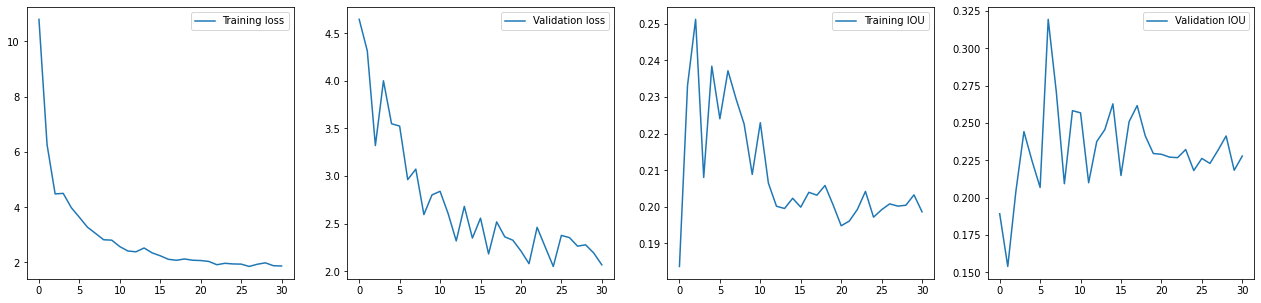

In [ ]:
plt.figure(figsize=(22,5))
plt.subplot(141)
plt.plot(history.epoch, history.history.get('loss'), label="Training loss")
plt.legend()
plt.subplot(142)
plt.plot(history.epoch, history.history.get('val_loss'), label="Validation loss")
plt.legend()
plt.subplot(143)
plt.plot(history.epoch, history.history.get('iou_coef'), label="Training IOU")
plt.legend()
plt.subplot(144)
plt.plot(history.epoch, history.history.get('val_iou_coef'), label="Validation IOU")
plt.legend()

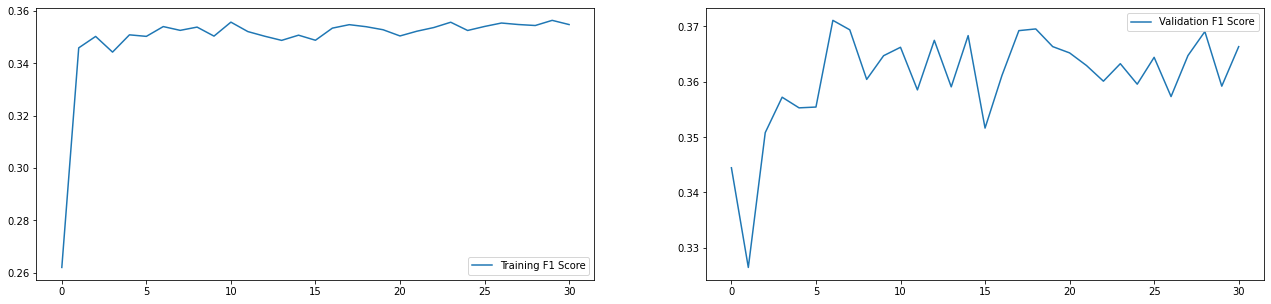

In [ ]:
plt.figure(figsize=(22,5))
plt.subplot(121)
plt.plot(history.epoch, history.history.get('f1_score'), label="Training F1 Score")
plt.legend()
plt.subplot(122)
plt.plot(history.epoch, history.history.get('val_f1_score'), label="Validation F1 Score")
plt.legend()

In [ ]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 300, 300, 3)   0                                            
____________________________________________________________________________________________________
conv1_1 (Convolution2D)          (None, 300, 300, 64)  1792        input_4[0][0]                    
____________________________________________________________________________________________________
conv1_2 (Convolution2D)          (None, 300, 300, 64)  36928       conv1_1[0][0]                    
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 150, 150, 64)  0           conv1_2[0][0]                    
___________________________________________________________________________________________

#### Evaluate the model

In [ ]:
X_test, y_test = next(gen.generate())

In [ ]:
model.evaluate(X_test, y_test, batch_size=32)

32/32 [==============================] - 0s


[2.0245747566223145, 0.35517293214797974, 0.20262028276920319]

In [ ]:
y_pred = model.predict(X_test, batch_size=32, verbose=1)

32/32 [==============================] - 0s


In [ ]:
print(X_test.shape, y_test.shape, y_pred.shape)

(32, 300, 300, 3) (32, 7308, 15) (32, 7308, 15)


In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall


     |████████████████████████████████| 2.9MB 4.2MB/s 
     |████████████████████████████████| 15.3MB 338kB/s 
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorflow-estimator<2.6.0,>=2.5.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: pymc3 3.11.2 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompa

In [ ]:
best_model = SSD300(input_shape, num_classes=NUM_CLASSES)
best_model.load_weights('./checkpoints/weights.06-2.96.hdf5', by_name=True)
best_model.compile(optimizer=optim,
              loss=MultiboxLoss(NUM_CLASSES, neg_pos_ratio=2.0).compute_loss, metrics=[f1_score, iou_coef])

7308
()


In [ ]:
y_pred_best = best_model.predict(X_test, batch_size=32, verbose=1)
print('Test IOU:', best_model.evaluate(X_test, y_test, batch_size=32)[2])


32/32 [==============================] - 0s
Test IOU: 0.2659481167793274


In [ ]:
print('Test F1 Score:', best_model.evaluate(X_test, y_test, batch_size=32)[1])


32/32 [==============================] - 0s
Test F1 Score: 0.3640618324279785


#### Visualize Predicted bounding boxes

In [ ]:
# tf.keras.backend.clear_session()

In [ ]:
# tf.keras.backend.get_session()

In [ ]:
tf.reset_default_graph()

In [ ]:
# sess = tf.Session(config=tf.ConfigProto(
#       allow_soft_placement=True, log_device_placement=True))


# tf.keras.backend.get_session()
# with sess.run(fetches= ):
# with tf.device('/job:localhost/replica:0/task:0/device:CPU:0'):
# with tf.device('/device:GPU:0'):
# with tf.Session() as sess:

results = bbox_util.detection_out(y_pred_best)

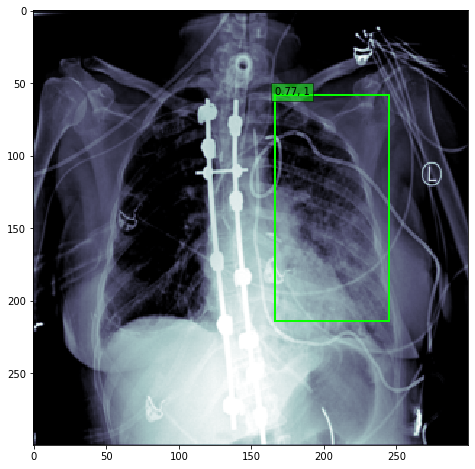

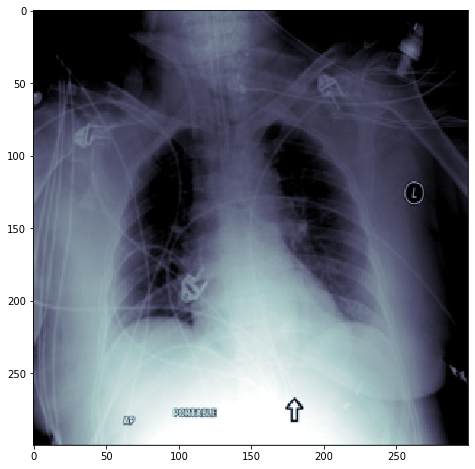

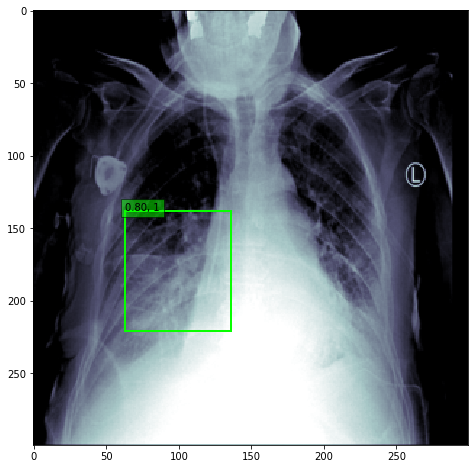

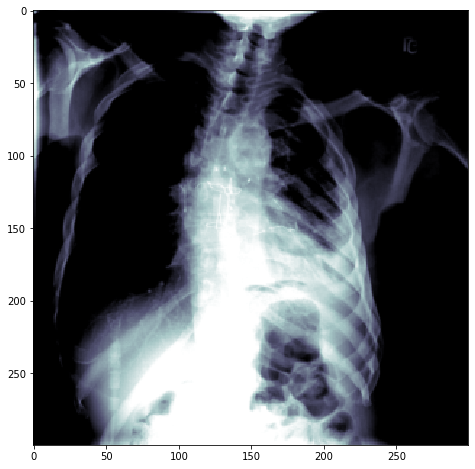

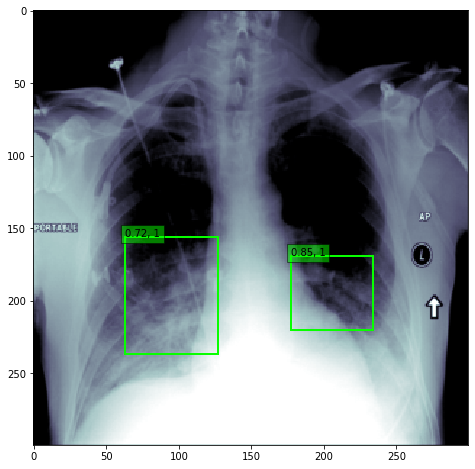

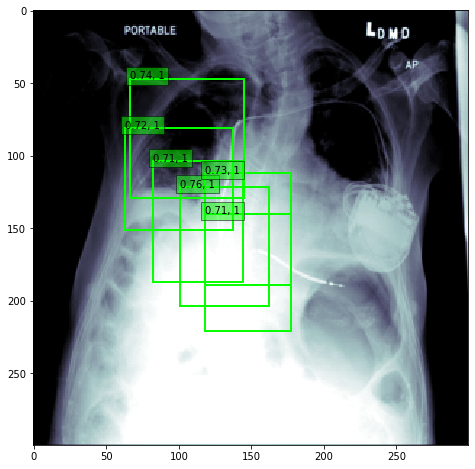

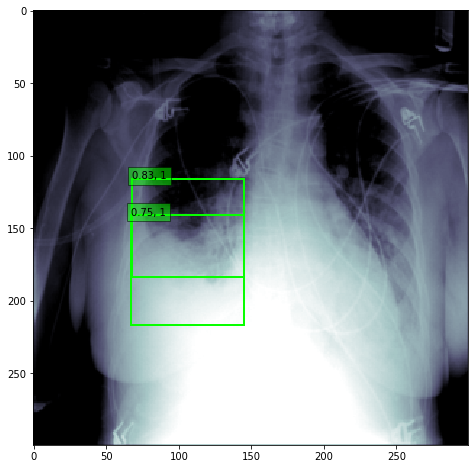

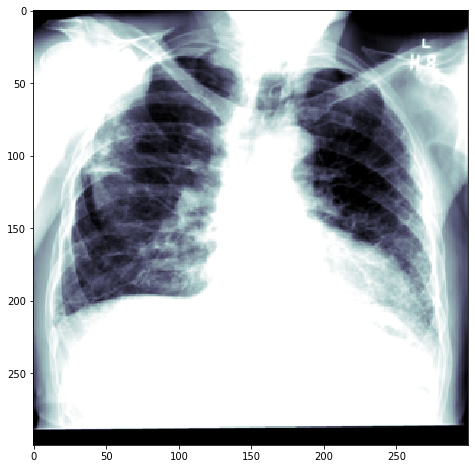

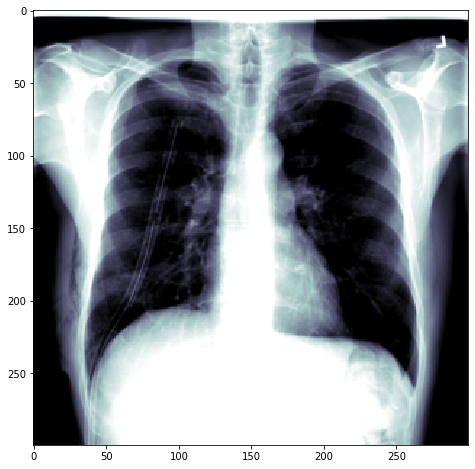

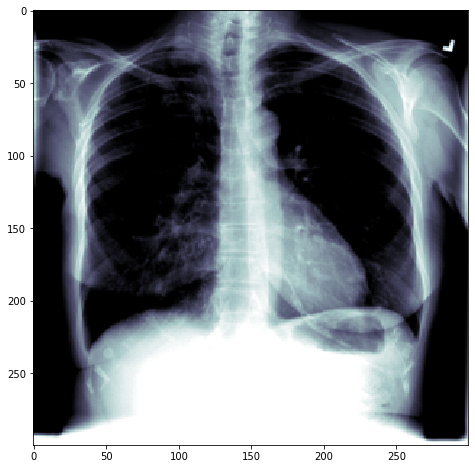

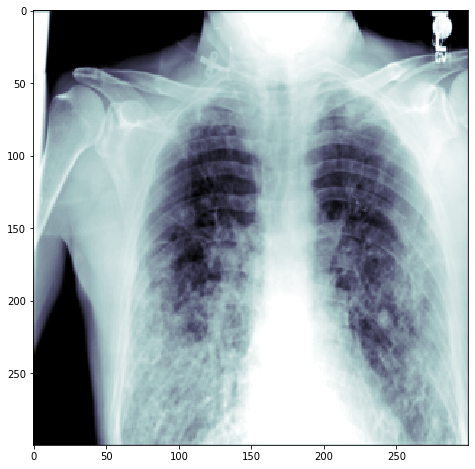

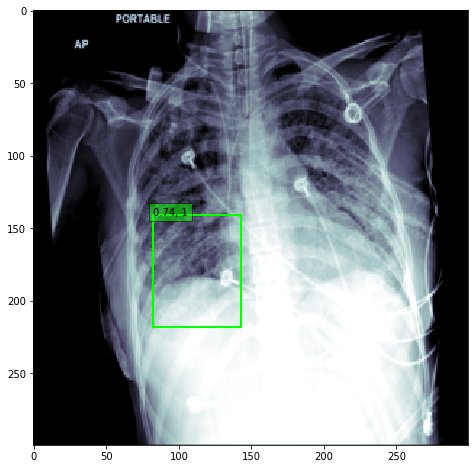

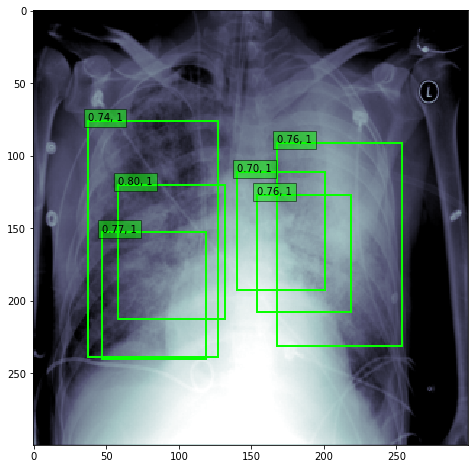

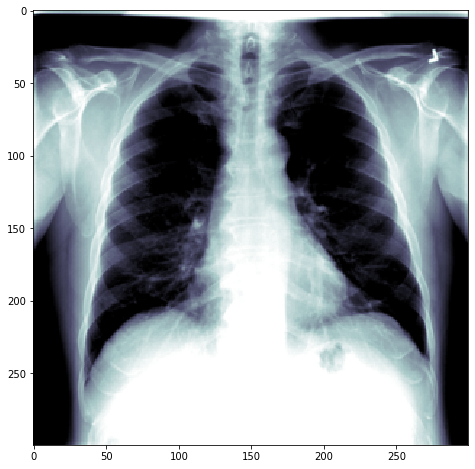

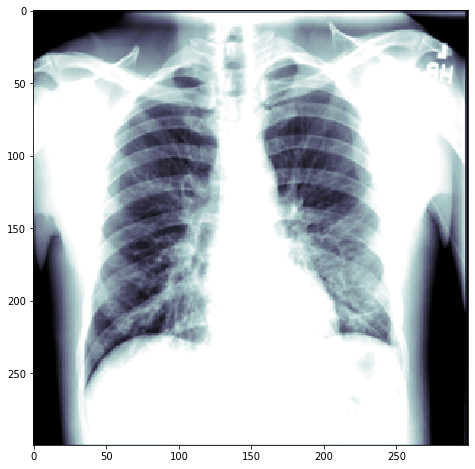

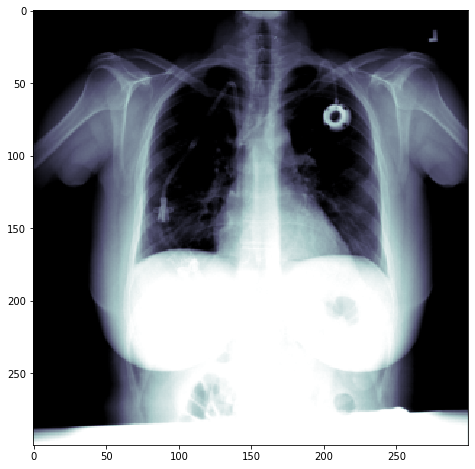

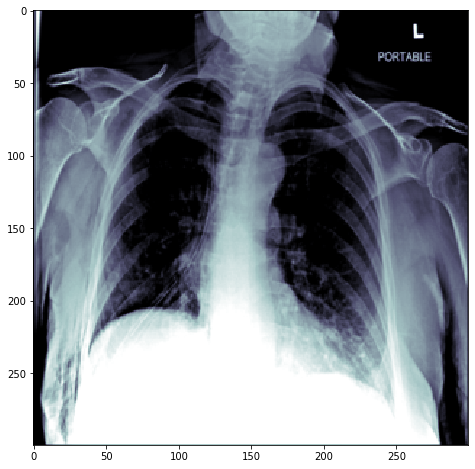

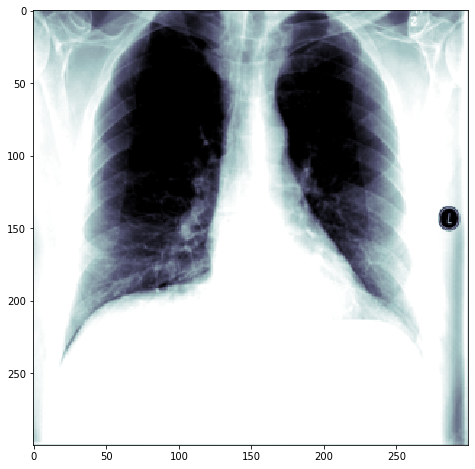

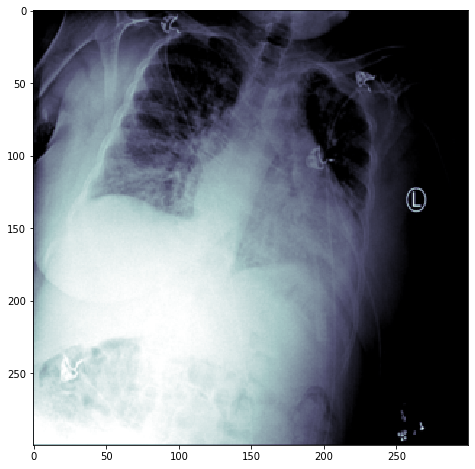

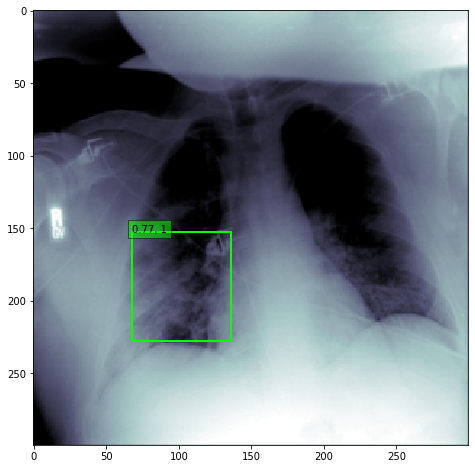

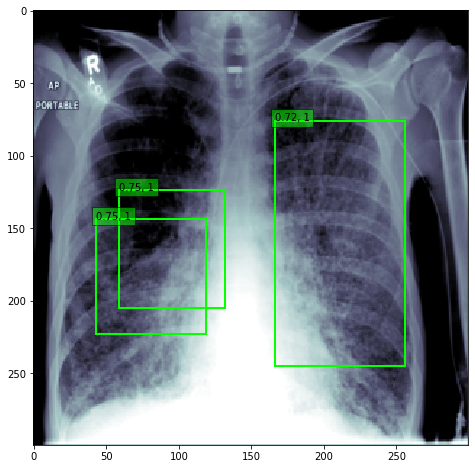

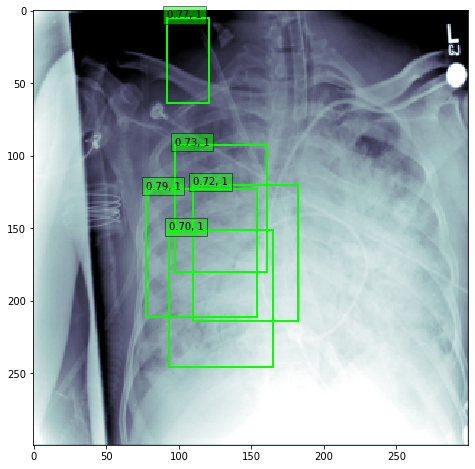

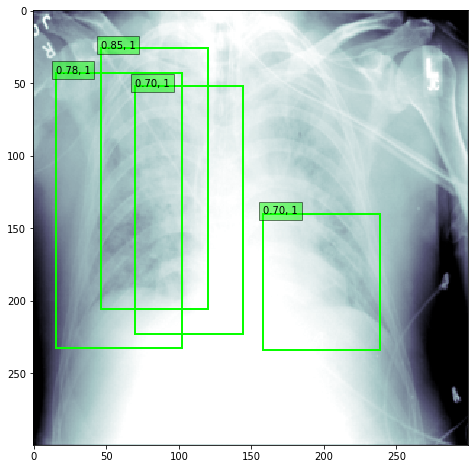

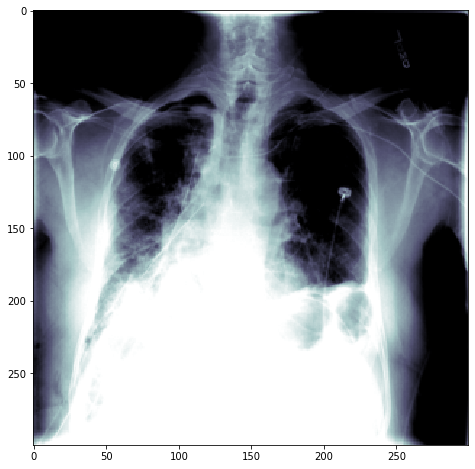

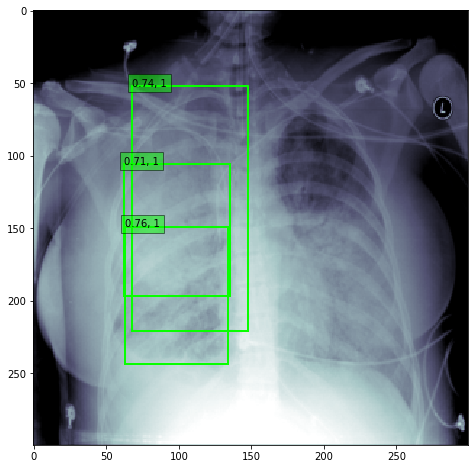

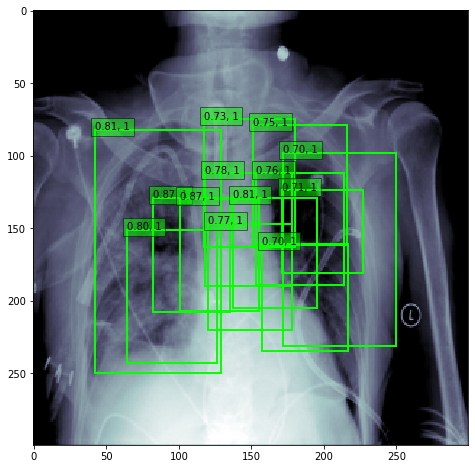

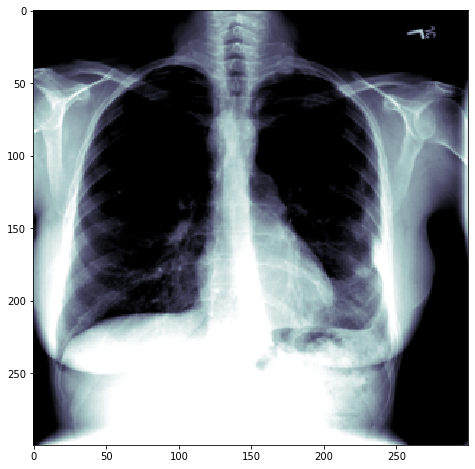

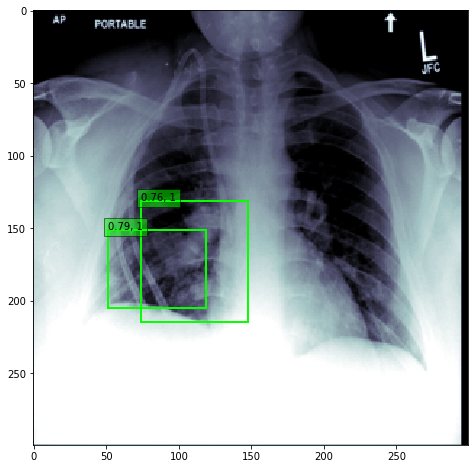

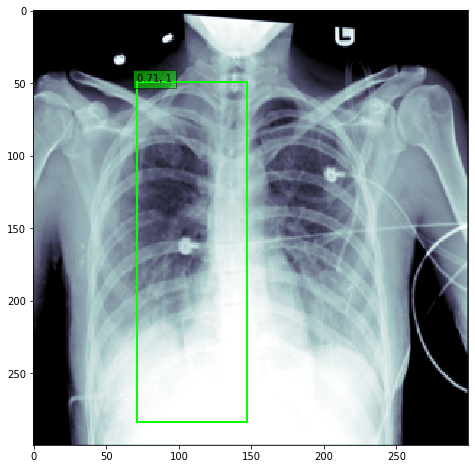

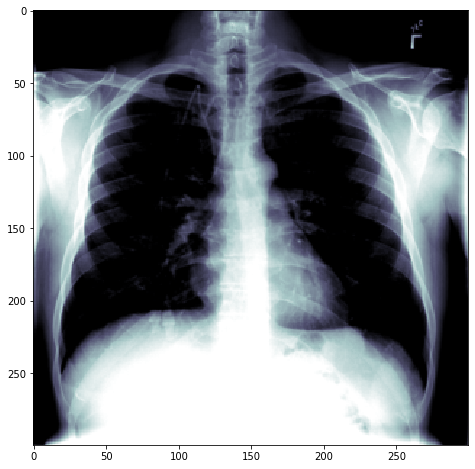

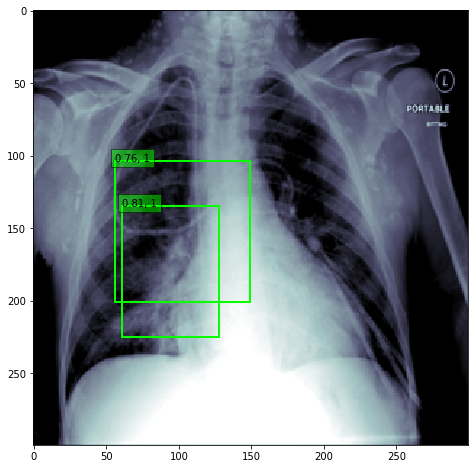

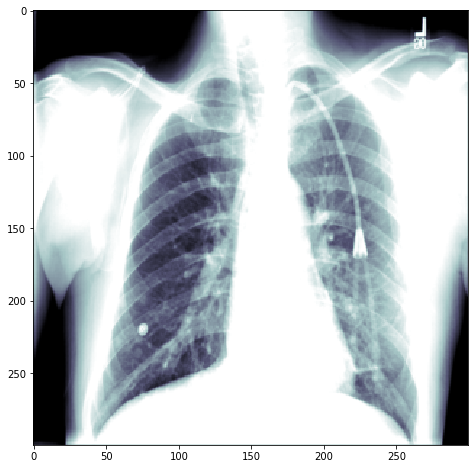

In [ ]:
for i, img in enumerate(X_test):
    # Parse the outputs.
    det_label = results[i][:, 0]
    det_conf = results[i][:, 1]
    det_xmin = results[i][:, 2]
    det_ymin = results[i][:, 3]
    det_xmax = results[i][:, 4]
    det_ymax = results[i][:, 5]

    # Get detections with confidence higher than 0.6.
    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.7]

    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    colors = plt.cm.hsv(np.linspace(0, 1, 4)).tolist()

    # gray = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])   
    gray = img[:,:,2]
    plt.imshow(gray / 255., cmap=plt.cm.bone)
    # plt.imshow(img / 255., cmap=plt.cm.bone)
    currentAxis = plt.gca()

    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        score = top_conf[i]
        label = int(top_label_indices[i])
#         label_name = voc_classes[label - 1]
        display_txt = '{:0.2f}, {}'.format(score, label)
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})
    
    plt.show()